<a href="https://colab.research.google.com/github/paolobalasso/YoutubeTrading/blob/main/HedgedvsUnheadged.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
%%capture
!pip install yfinance
!pip install prophet

%matplotlib inline

In [4]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from prophet import Prophet



[*********************100%***********************]  3 of 3 completed


<Axes: xlabel='Date'>

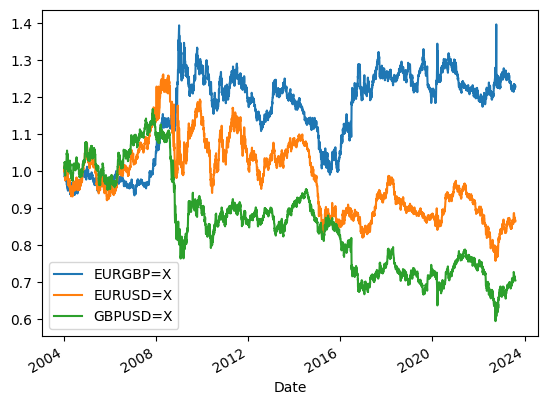

In [5]:
#EXCHANGE RATE

exchange_df = yf.download(['EURUSD=X','GBPUSD=X','EURGBP=X'],'2004-01-04',end = '2024-01-01')['Close']
(exchange_df.pct_change()+1).cumprod().plot()

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  1 of 1 completed


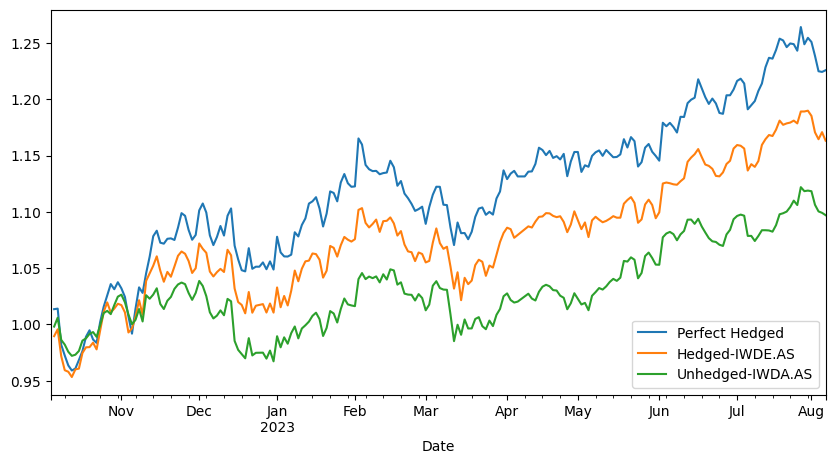

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

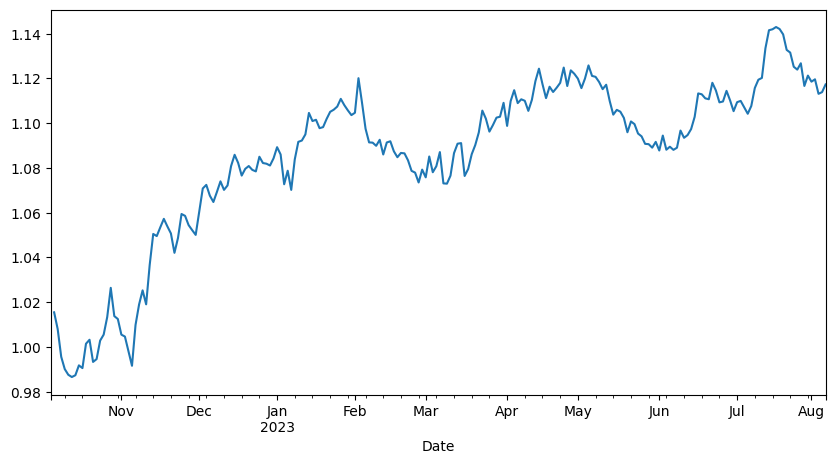

In [8]:
#MSCI WORLD

%matplotlib inline
prices = yf.download(['IWDE.AS','IWDA.AS'],"2022-10-04",end = '2024-01-01')['Adj Close']
(prices['IWDA.AS'].multiply(yf.download(['EURUSD=X'],'2022-10-04',end = '2024-01-01')['Close'],axis="index").pct_change()+1).cumprod().plot(label ='Perfect Hedged',figsize=(10,5))
(prices['IWDE.AS'].pct_change()+1).cumprod().plot(label ='Hedged-IWDE.AS')
(prices['IWDA.AS'].pct_change()+1).cumprod().plot(label ='Unhedged-IWDA.AS')
plt.legend( loc ="lower right")
plt.show()
(yf.download(['EURUSD=X'],'2022-10-04',end = '2024-01-01')['Close'].pct_change()+1).cumprod().plot(figsize=(10,5))


In [ ]:
%matplotlib inline
prices = yf.download(['IWDE.AS','IWDA.AS'],"2022-10-04",end = '2024-01-01')['Adj Close']
prices['IWDA.PerfectHedged'] = prices['IWDA.AS'].multiply(yf.download(['EURUSD=X'],'2022-10-04',end = '2024-01-01')['Close'],axis="index")

(prices.pct_change()+1).cumprod()

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  1 of 1 completed


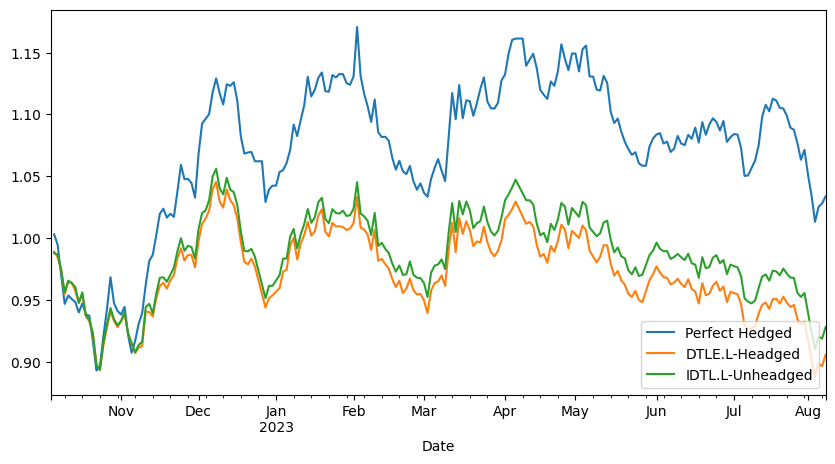

[*********************100%***********************]  1 of 1 completed


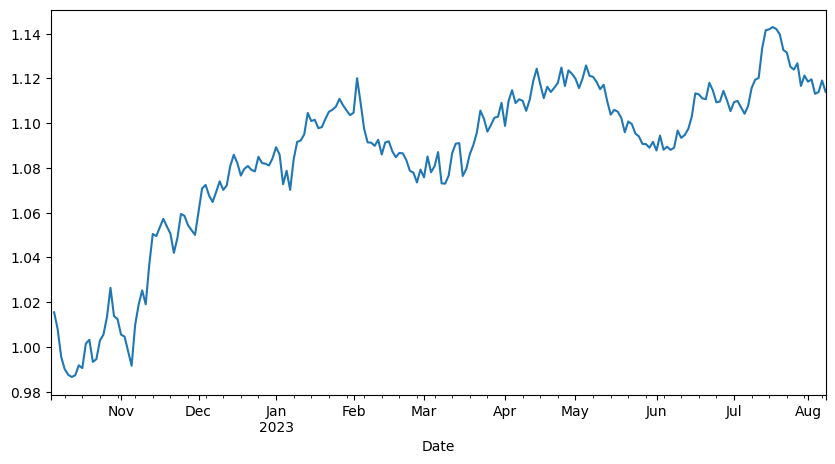

[*********************100%***********************]  1 of 1 completed


,DTLE.L,IDTL.L,IDTL.PerfectHedged
Date,,,
2022-10-04,NaN,NaN,NaN
2022-10-05,0.989018,0.987723,1.003018
2022-10-06,0.984572,0.986689,0.994610
2022-10-07,0.974533,0.974283,0.970020
2022-10-10,0.954524,0.956190,0.946751
...,...,...,...
2023-08-02,0.902041,0.924141,1.034658
2023-08-03,0.887556,0.910184,1.013132
2023-08-04,0.898471,0.920393,1.025192


In [92]:
#BOND ETFS
%matplotlib inline
prices = yf.download(['DTLE.L','IDTL.L'],"2022-10-04",end = '2024-01-01')['Adj Close']
(prices['IDTL.L'].multiply(yf.download(['EURUSD=X'],'2022-10-04',end = '2024-01-01')['Close'],axis="index").pct_change()+1).cumprod().plot(label ='Perfect Hedged',figsize=(10,5))
(prices['DTLE.L'].pct_change()+1).cumprod().plot(label ='DTLE.L-Headged')
(prices['IDTL.L'].pct_change()+1).cumprod().plot(label ='IDTL.L-Unheadged')
plt.legend( loc ="lower right")
plt.show()
(yf.download(['EURUSD=X'],'2022-10-04',end = '2024-01-01')['Close'].pct_change()+1).cumprod().plot(figsize=(10,5))
plt.show()

prices['IDTL.PerfectHedged'] = prices['IDTL.L'].multiply(yf.download(['EURUSD=X'],'2022-10-04',end = '2024-01-01')['Close'],axis="index")
(prices.pct_change()+1).cumprod()**(1)


[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  1 of 1 completed


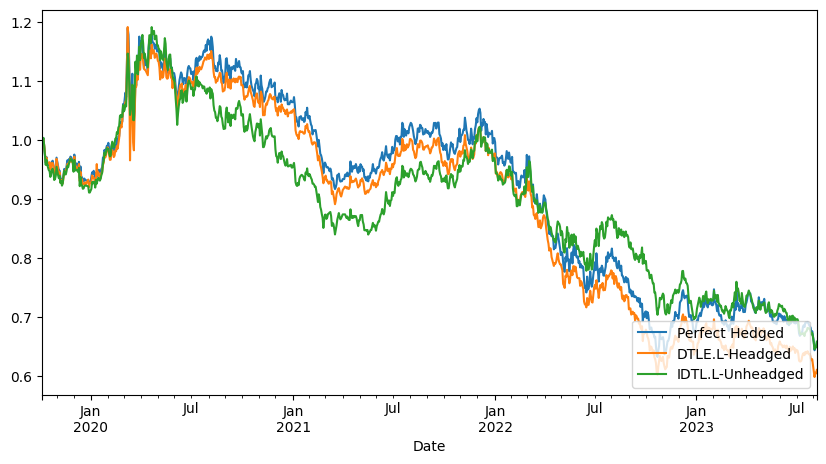

[*********************100%***********************]  1 of 1 completed


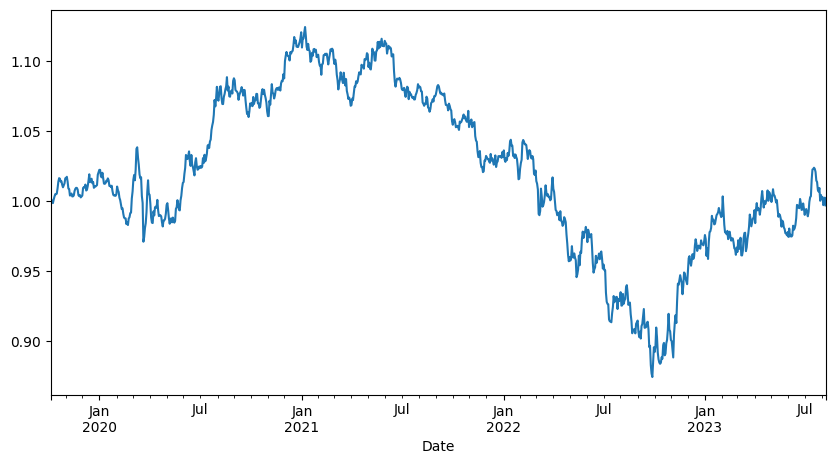

[*********************100%***********************]  1 of 1 completed


,DTLE.L,IS04.DE,IDTL.PerfectHedged
Date,,,
2019-10-04,NaN,NaN,NaN
2019-10-07,0.999455,0.999372,0.999627
2019-10-08,1.000295,1.000927,1.000853
2019-10-09,0.997929,0.997684,0.997337
2019-10-10,0.994118,0.993279,0.993560
...,...,...,...
2023-08-02,0.882844,0.900006,0.900671
2023-08-03,0.879279,0.896161,0.895523
2023-08-04,0.881969,0.897288,0.896802


In [100]:
#BOND ETFS
%matplotlib inline
prices = yf.download(['DTLE.L','IS04.DE'],"2019-10-04",end = '2024-01-01')['Adj Close']
(prices['IS04.DE'].multiply(yf.download(['EURUSD=X'],'2019-10-04',end = '2024-01-01')['Close'],axis="index").pct_change()+1).cumprod().plot(label ='Perfect Hedged',figsize=(10,5))
(prices['DTLE.L'].pct_change()+1).cumprod().plot(label ='DTLE.L-Headged')
(prices['IS04.DE'].pct_change()+1).cumprod().plot(label ='IDTL.L-Unheadged')
plt.legend( loc ="lower right")
plt.show()
(yf.download(['EURUSD=X'],'2019-10-04',end = '2024-01-01')['Close'].pct_change()+1).cumprod().plot(figsize=(10,5))
plt.show()

prices['IDTL.PerfectHedged'] = prices['IS04.DE'].multiply(yf.download(['EURUSD=X'],'2019-10-04',end = '2024-01-01')['Close'],axis="index")
(prices.pct_change()+1).cumprod()**(1/4)


16

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  1 of 1 completed


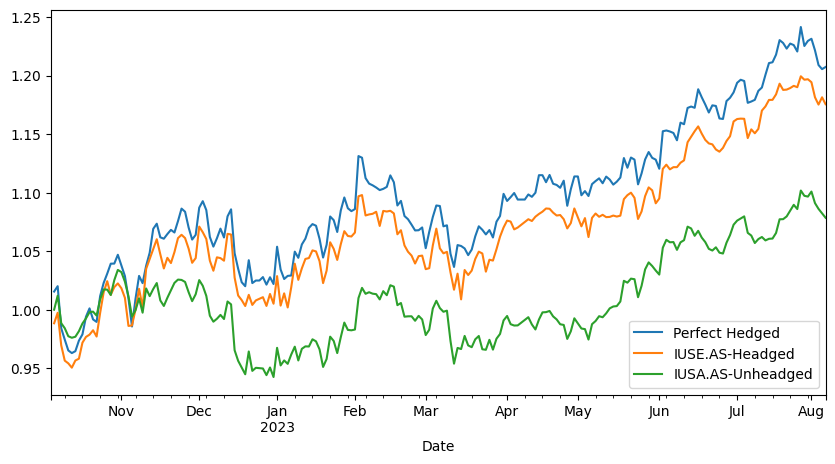

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

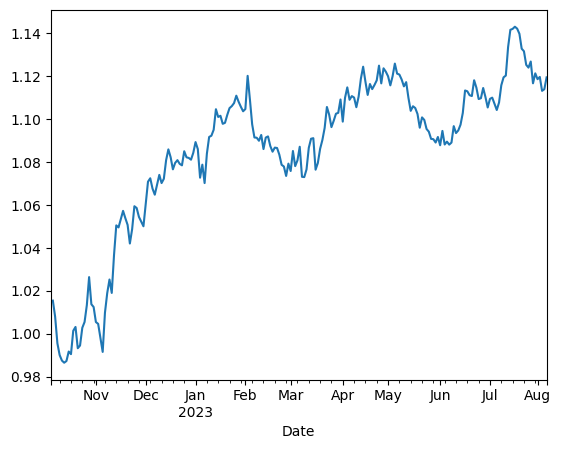

In [21]:
#MSCI US
%matplotlib inline
prices = yf.download(['IUSA.AS','IUES.AS'],"2022-10-04",end = '2024-01-01')['Adj Close']
(prices['IUSA.AS'].multiply(yf.download(['EURUSD=X'],'2022-10-04',end = '2024-01-01')['Close'],axis="index").pct_change()+1).cumprod().plot(label ='Perfect Hedged',figsize=(10,5))
(prices['IUES.AS'].pct_change()+1).cumprod().plot(label ='IUSE.AS-Headged',figsize=(10,5))
(prices['IUSA.AS'].pct_change()+1).cumprod().plot(label ='IUSA.AS-Unheadged',figsize=(10,5))
plt.legend( loc ="lower right")
plt.show()
(yf.download(['EURUSD=X'],'2022-10-04',end = '2024-01-01')['Close'].pct_change()+1).cumprod().plot()



In [22]:
%matplotlib inline
prices = yf.download(['IUSA.AS','IUES.AS'],"2022-10-04",end = '2024-01-01')['Adj Close']
prices['IUSA.PerfectHedged'] = prices['IUSA.AS'].multiply(yf.download(['EURUSD=X'],'2019-10-04',end = '2024-01-01')['Close'],axis="index")

(prices.pct_change()+1).cumprod()

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  1 of 1 completed


,IUES.AS,IUSA.AS,IUSA.PerfectHedged
Date,,,
2022-10-04,NaN,NaN,NaN
2022-10-05,0.988406,1.000000,1.015486
2022-10-06,0.997366,1.011948,1.020072
2022-10-07,0.969636,0.988476,0.984150
2022-10-10,0.956491,0.984184,0.974469
...,...,...,...
2023-08-01,1.194259,1.100885,1.231387
2023-08-02,1.181397,1.091030,1.221505
2023-08-03,1.175182,1.086102,1.208948


In [83]:
#### Prediction

"""
Functions to evaluate the model
"""
def MAPE(y, y_hat):
        return np.mean(np.abs((y - y_hat)/y)) * 100

def RMSE(y, y_hat):
    return np.sqrt(np.mean(np.square(y - y_hat)))

"""
Function to perform a univariate forecast and evaluate performance
"""
def uni_forecast(slug_df_lst, slug='EURUSD=X', plot=False, plot_comp=False):
    print('='*40)
    new = exchange_df_w['EURUSD=X'].reset_index()[['Date', 'EURUSD=X']]
    new = new.rename(columns={'Date': 'ds', 'EURUSD=X': 'y'})

    test_data = new.loc[(len(new)-52):len(new)]
    train_data = new.drop(test_data.index)
    print(f'Training data shape: {train_data.shape}')
    print(f'Test data shape: {test_data.shape}')

    model = Prophet(seasonality_mode='multiplicative')
    model.fit(train_data)

    future = test_data[['ds']]
    forecast = model.predict(future)
    print(f'Forecast data shape: {forecast.shape}')

    if plot == True:
          model.plot(forecast)
          exchange_df_w['EURUSD=X'].iloc[(len(new)-52):len(new)].plot(label='Test',color='black')
          plt.show()
    if plot_comp == True:
          model.plot_components(forecast)
          plt.show()

    mape = str(round(MAPE(test_data['y'].values, forecast['yhat'].values),2)) + "%"
    rmse = round(RMSE(test_data['y'].values, forecast['yhat'].values), 5)
    print(f'MAPE: {mape}')
    print(f'RMSE: {rmse}')


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj_jv9vak/8q9sopij.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj_jv9vak/d25h9sd8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91785', 'data', 'file=/tmp/tmpj_jv9vak/8q9sopij.json', 'init=/tmp/tmpj_jv9vak/d25h9sd8.json', 'output', 'file=/tmp/tmpj_jv9vak/prophet_model8j4uang9/prophet_model-20230808125525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:55:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training data shape: (971, 2)
Test data shape: (52, 2)


12:55:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast data shape: (52, 16)


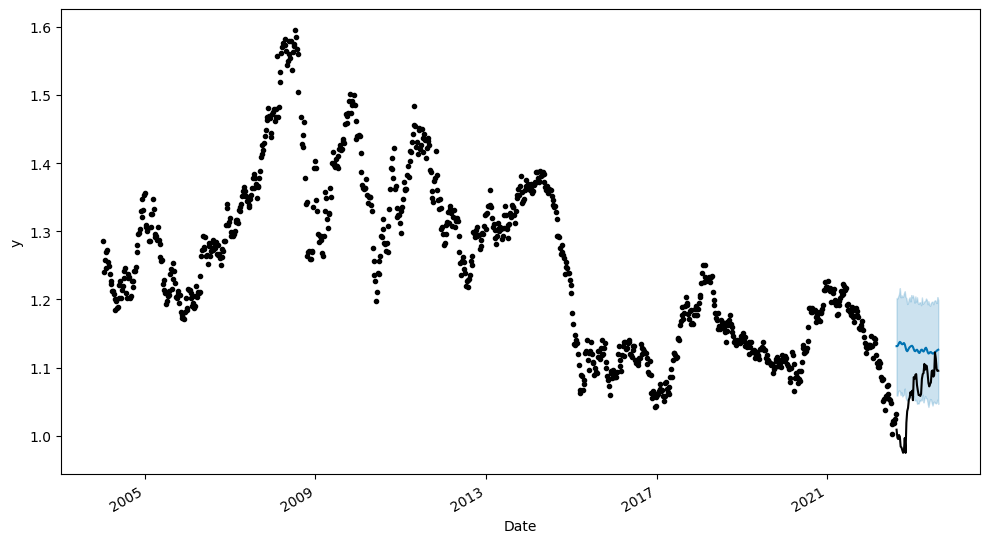

MAPE: 6.75%
RMSE: 0.08337


In [75]:
exchange_df_w = exchange_df.resample("W-FRI").last()
uni_forecast(exchange_df_w, slug='EURUSD=X', plot=True, plot_comp=False)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj_jv9vak/43gk9w7a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj_jv9vak/xpeu3l05.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48730', 'data', 'file=/tmp/tmpj_jv9vak/43gk9w7a.json', 'init=/tmp/tmpj_jv9vak/xpeu3l05.json', 'output', 'file=/tmp/tmpj_jv9vak/prophet_modelk934y37f/prophet_model-20230808134344.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:43:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:43:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


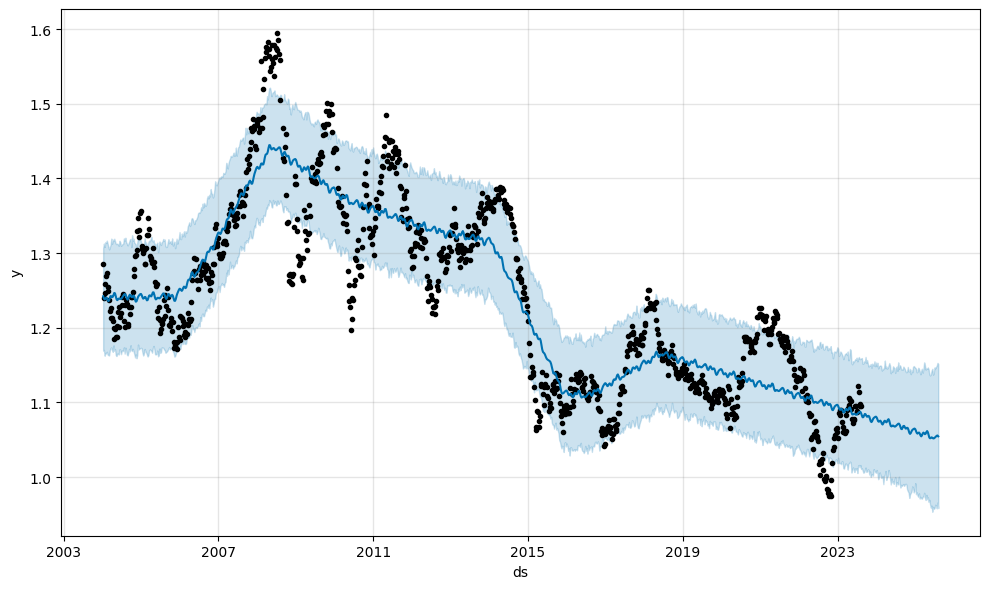

In [102]:
exchange_df_w = exchange_df.resample("W-FRI").last()
new = exchange_df_w['EURUSD=X'].reset_index()[['Date', 'EURUSD=X']]
new = new.rename(columns={'Date': 'ds', 'EURUSD=X': 'y'})
m = Prophet(seasonality_mode='multiplicative',yearly_seasonality=True).fit(new)
future = m.make_future_dataframe(periods=104,freq="W-FRI")
fcst = m.predict(future)
fig = m.plot(fcst)
